In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
print( "no fraud", round(df["Class"].value_counts()[0]/len(df["Class"]) *  100 , 2), "% of the dataset")
print("fraud", round(df["Class"].value_counts()[1]/len(df) * 100, 2), "% of the dataset ")

no fraud 99.83 % of the dataset
fraud 0.17 % of the dataset 


##### as we can see there is no missing values but there is huge unbalance of the target class

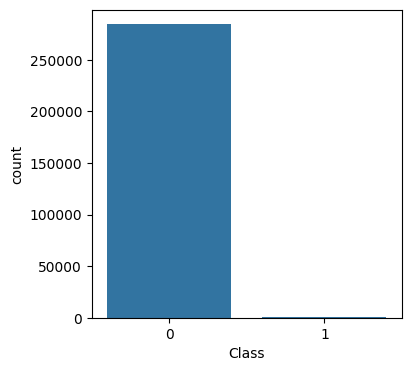

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(df,x = "Class", ax= ax )
plt.show();

In [9]:
#Time and Amount should be scaled as the other features 

from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df["scaled_amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = std_scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df.drop(["Time", "Amount"], axis = 1, inplace = True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold

X = df.drop("Class", axis = 1)
y = df["Class"]

sss = StratifiedShuffleSplit(n_splits = 5, random_state=None)

for train_index, test_index in sss.split(X, y):
    original_Xtrian, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrian = original_Xtrian.values
original_ytest = original_ytest.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)


In [11]:
print("Label DIstributions: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Label DIstributions: 

[0.99827173 0.00172827]
[0.99827955 0.00172045]


In [12]:
#since out classes are highly skewed we should make them equivalent in order to have a normal distribution of classes 

#lets shuffle before creating subsamples 

df = df.sample(frac = 1)

#amount of fraud clases 492 rows 

fraud_df = df.loc[df["Class"]==1]
non_fraud_df = df.loc[df["Class"]==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#shuffle dataframe rows

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
151624,-0.002983,1.071992,-0.246253,0.630531,1.085070,-0.345246,1.245585,-0.494005,0.511794,0.345051,...,0.739798,-0.252742,0.701204,-0.093771,0.543877,0.068287,-0.032785,0,0.036331,0.020850
83417,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,-3.252634,...,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,1,-0.224831,-0.736477
41227,-0.928282,-0.333968,0.980840,-1.769533,0.905853,-1.288849,0.297423,-0.152014,-2.055005,0.171533,...,0.725178,-0.243433,0.064615,0.509555,-0.237828,0.007140,0.089847,0,0.041920,-1.141737
69498,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,...,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,1,-0.195626,-0.871016
150663,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1,4.108992,-0.020234


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


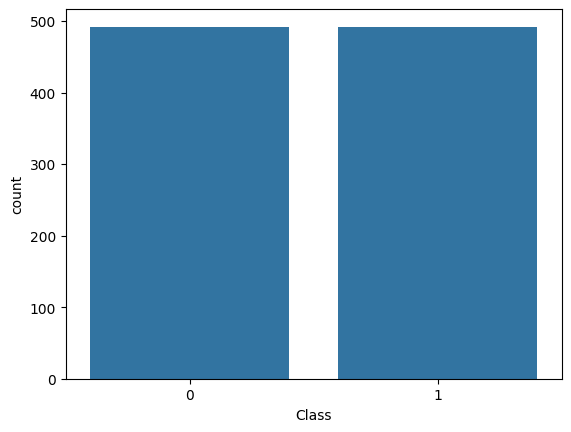

In [13]:
print("Distribution of the Classes in the subsample dataset")
print(new_df["Class"].value_counts()/len(new_df))

sns.countplot(data = new_df,x = "Class")
plt.show()

##### correlation matrices 


Text(0.5, 1.0, 'sub sample correlation matricx \n (wecan use it as a reference)')

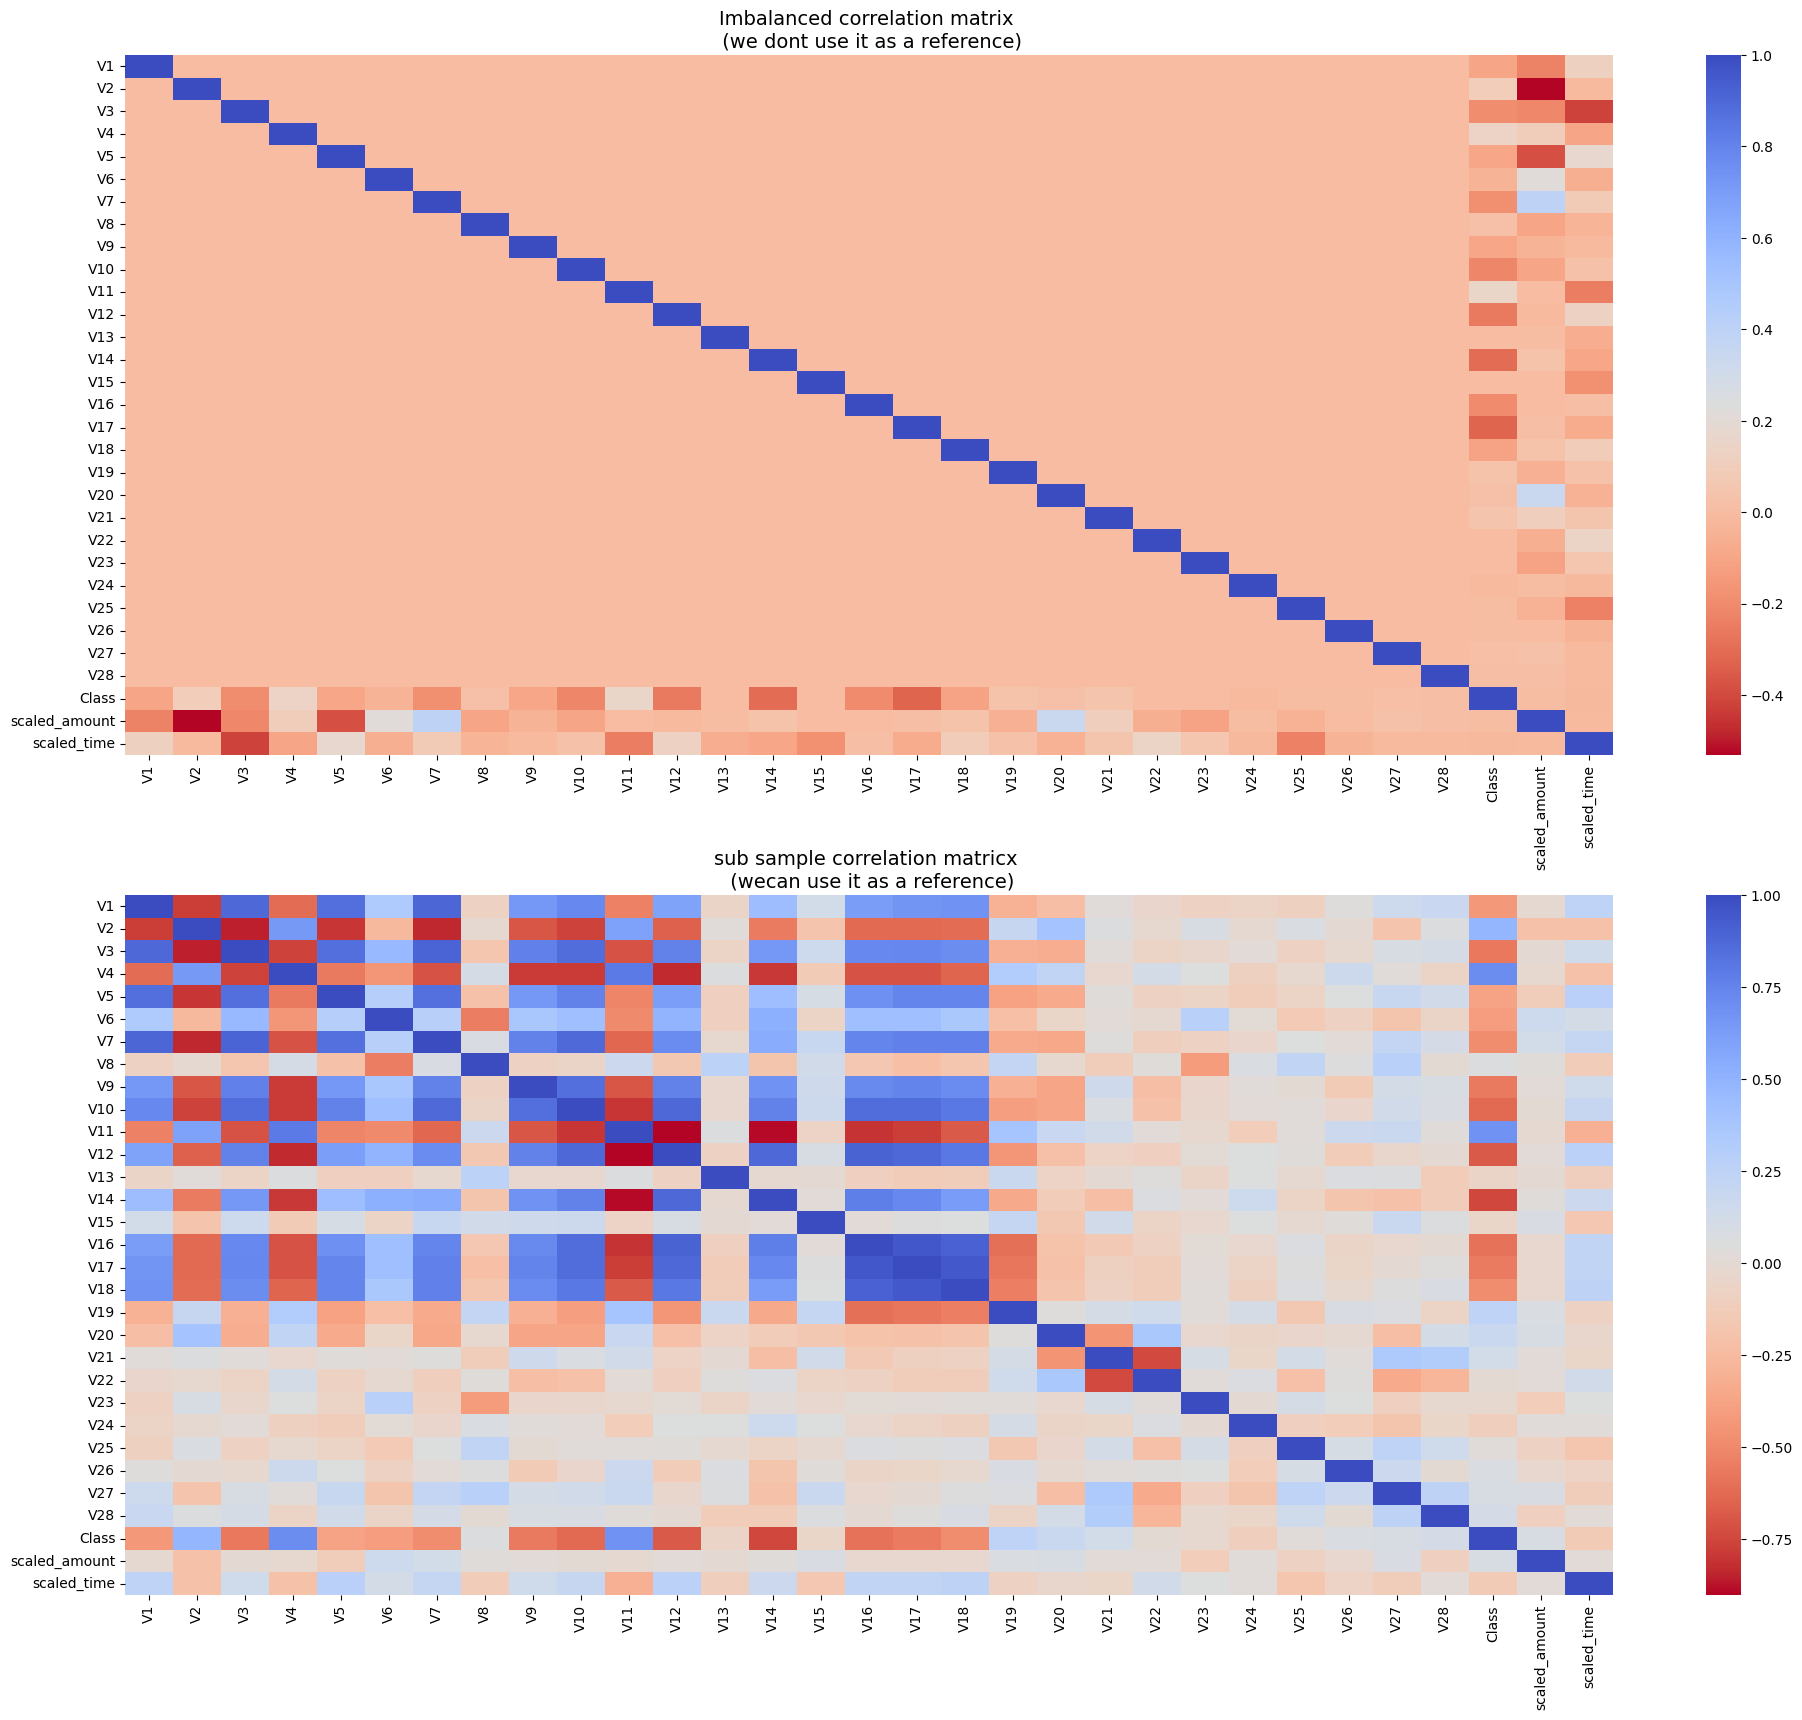

In [14]:
f, (ax1, ax2 ) = plt.subplots(2, 1, figsize = (24, 20))

# Entire Dataframe

corr = df.corr()

sns.heatmap(corr, cmap = "coolwarm_r", annot_kws={"size" : 20}, ax = ax1)
ax1.set_title("Imbalanced correlation matrix \n (we dont use it as a reference)", fontsize = 14)


sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr, cmap = "coolwarm_r", annot_kws={"size": 20}, ax = ax2)
ax2.set_title("sub sample correlation matricx \n (wecan use it as a reference)", fontsize = 14)

##### summary of the correlation matrics of the sub sample df
negative correlation: as we can see v10, v12, v14, and v17 are highly negatively coorelated when these feature decreases there is a hign chance of the detection going to be fraud.


positive correlation: as the sub samle referance there is small amount of features that are positively related compared to the negatively coorelatd feaures, these are as we can see v2, v4, v11, v19 as the values of these increase ther is high chance of the detection going to be fraud

##### BoxPlots

Text(0.5, 1.0, 'v17 vs class negative coorelation ')

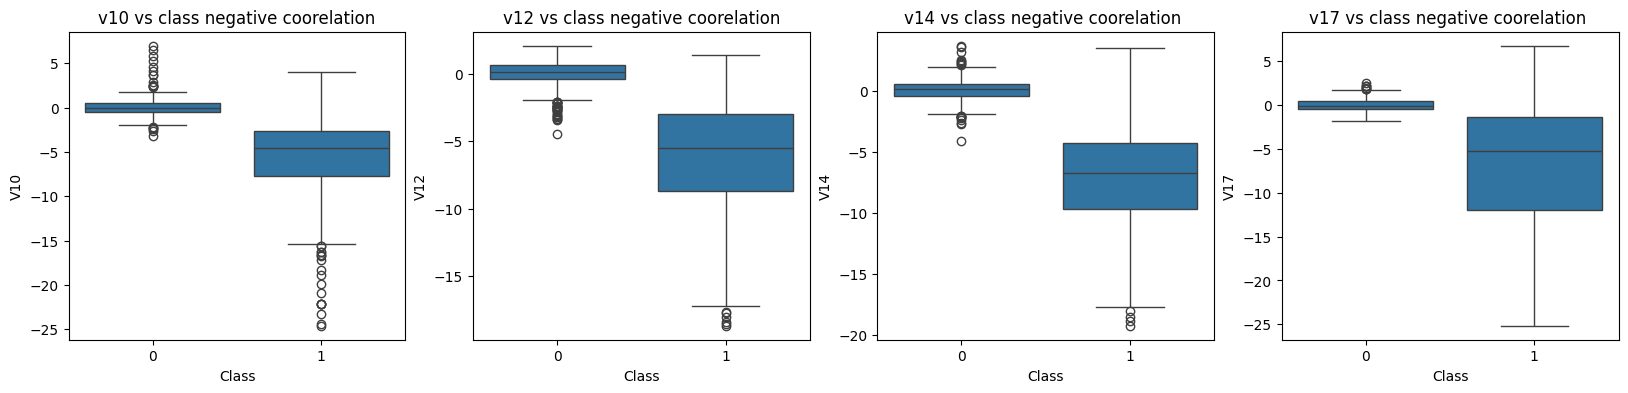

In [15]:
f, axes = plt.subplots(ncols = 4, figsize = (20, 4))

# Negative Correlations with our class (The lower our features vlaues the more likely it will be a fraud  transaction)
sns.boxplot(x = "Class", y = "V10", data = new_df , ax = axes[0])
axes[0].set_title("v10 vs class negative coorelation")

sns.boxplot(x = "Class", y = "V12", data = new_df, ax = axes[1])
axes[1].set_title("v12 vs class negative coorelation")

sns.boxplot(x = "Class", y = "V14", data = new_df, ax = axes[2])
axes[2].set_title("v14 vs class negative coorelation ")

sns.boxplot(x = "Class", y = "V17", data = new_df, ax = axes[3])
axes[3].set_title("v17 vs class negative coorelation ")

Text(0.5, 1.0, 'v19 vs class positive coorelation')

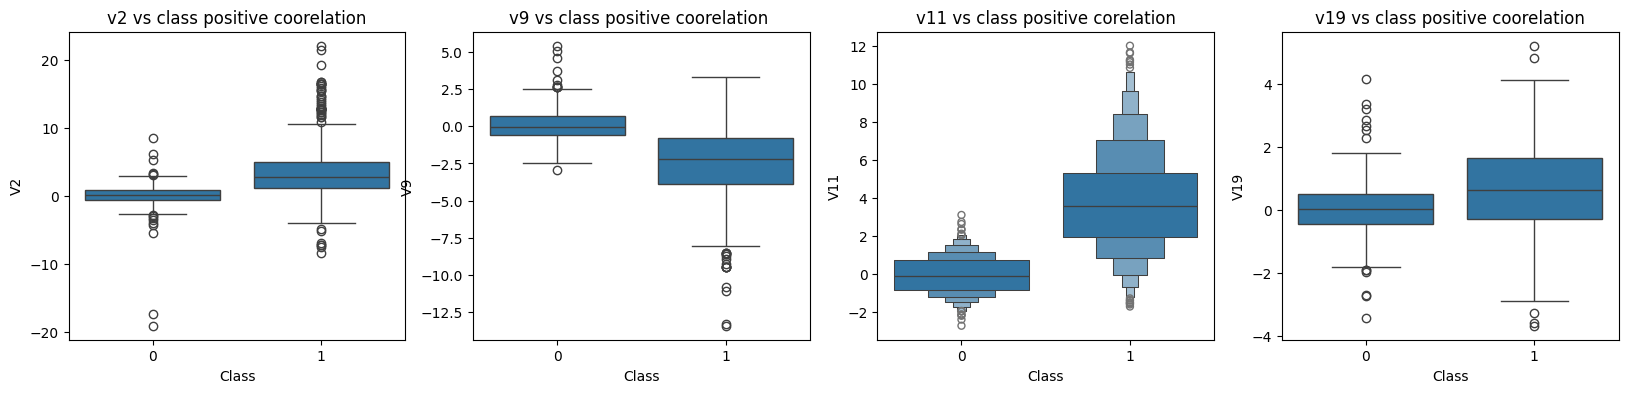

In [16]:
f, axes =plt.subplots(ncols = 4, figsize = (20, 4))

sns.boxplot(x = "Class", y = "V2", data = new_df, ax = axes[0])
axes[0].set_title("v2 vs class positive coorelation")

sns.boxplot(x = "Class", y = "V9", data = new_df, ax = axes[1])
axes[1].set_title("v9 vs class positive coorelation ")

sns.boxenplot(x = "Class", y = "V11", data = new_df, ax = axes[2])
axes[2].set_title("v11 vs class positive corelation")

sns.boxplot(x = "Class", y = "V19", data = new_df ,ax = axes[3])
axes[3].set_title("v19 vs class positive coorelation")

/tmp/ipython-input-2175281472.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/tmp/ipython-input-2175281472.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
/tmp/ipython-input-2175281472.p

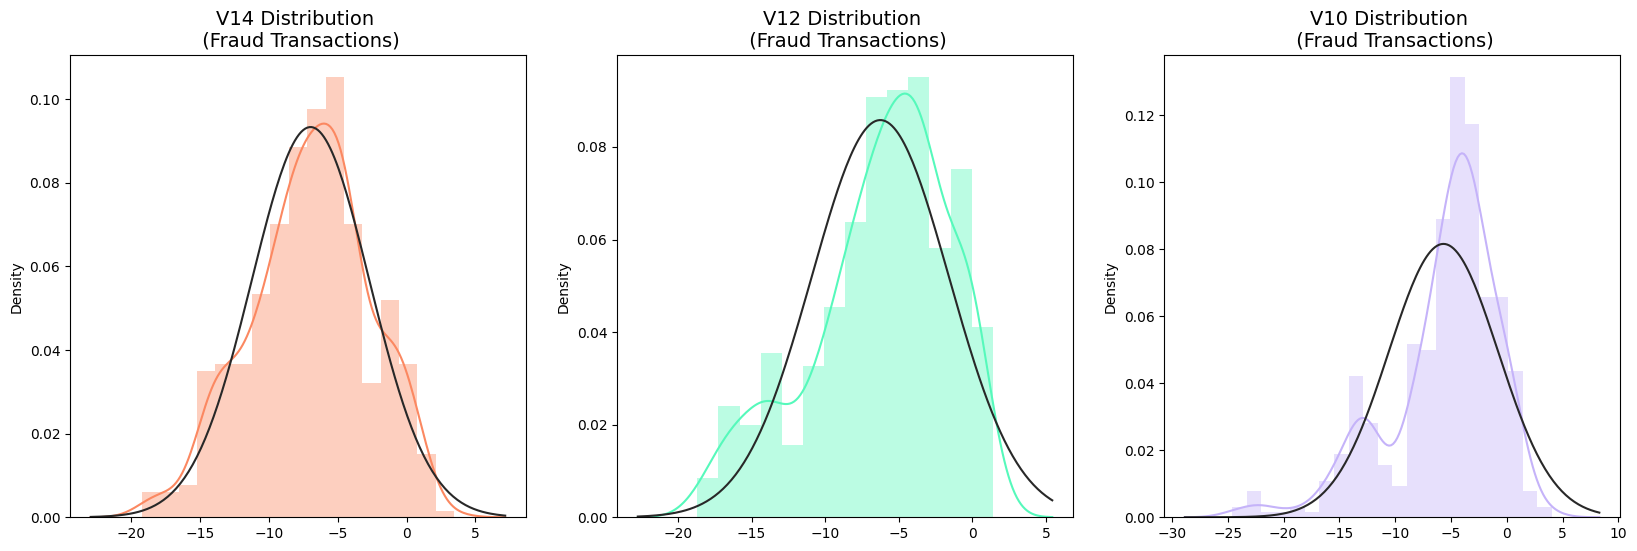

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show();


In [18]:
## removing outliers 
# removingv14 outlier (highest negative coorelated with labesls)

v14_fraud = new_df["V14"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

print("Quartile 25: {} | Quartile 75: {}".format(q25, q75))

v14_iqr = q75- q25

print("iqr : {}".format(v14_iqr))

v14_cutoff = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cutoff, q75 + v14_cutoff

print("Cutt off: {}".format(v14_cutoff))
print("v14 lower: {}".format(v14_lower))
print("v14 upper: {}".format(v14_upper))


outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print("Feature v14 outliers for fraud cases: {}".format(len(outliers)))
print("v14 Outliers: {}".format(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr : 5.409902115485521
Cutt off: 8.114853173228282
v14 lower: -17.807576138200666
v14 upper: 3.8320323237414167
Feature v14 outliers for fraud cases: 4
v14 Outliers: [np.float64(-18.0499976898594), np.float64(-18.8220867423816), np.float64(-19.2143254902614), np.float64(-18.4937733551053)]


In [19]:
# removing outliers form V12
v12_fraud = new_df["V12"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)

v12_iqr = q75 - q25

v12_cutoff = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff
print("V12 Lower Outlier: {}".format(v12_lower))
print("v12 Upper outlier: {}".format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

print("v12 outliers: {}".format(outliers))
new_df= new_df.drop(new_df[(new_df["V12"] > v12_upper) | (new_df["V12"] < v12_lower)].index)

V12 Lower Outlier: -17.3430371579634
v12 Upper outlier: 5.776973384895937
v12 outliers: [np.float64(-18.0475965708216), np.float64(-18.6837146333443), np.float64(-18.5536970096458), np.float64(-18.4311310279993)]


In [20]:
#removing outliers from v10

v10_fraud = new_df["V10"].loc[new_df["Class"] == 1].values
q25, q75 = np.percentile(v10_fraud,  25), np.percentile(v10_fraud, 75)

v10_irq = q75 - q25

v10_cutoff = v10_irq * 1.5
v10_lower, v10_upper = q25 - v10_cutoff, q75 + v10_cutoff

print("v10 Lower Otlier: {}".format(v10_lower))
print("v10 Upper outlier: {}".format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]

print("v10 outliers: {}".format(outliers))
new_df = new_df.drop(new_df[(new_df["V10"] > v10_upper) | (new_df["V10"] < v10_lower)].index)


v10 Lower Otlier: -14.89885463232024
v10 Upper outlier: 4.92033495834214
v10 outliers: [np.float64(-18.2711681738888), np.float64(-16.6496281595399), np.float64(-18.9132433348732), np.float64(-15.2318333653018), np.float64(-15.2399619587112), np.float64(-17.1415136412892), np.float64(-16.6011969664137), np.float64(-22.1870885620007), np.float64(-20.9491915543611), np.float64(-15.1241628144947), np.float64(-22.1870885620007), np.float64(-23.2282548357516), np.float64(-22.1870885620007), np.float64(-16.2556117491401), np.float64(-24.5882624372475), np.float64(-16.3035376590131), np.float64(-14.9246547735487), np.float64(-15.5637913387301), np.float64(-15.5637913387301), np.float64(-19.836148851696), np.float64(-16.7460441053944), np.float64(-24.4031849699728), np.float64(-22.1870885620007), np.float64(-15.2399619587112), np.float64(-14.9246547735487), np.float64(-15.1237521803455), np.float64(-15.3460988468775)]


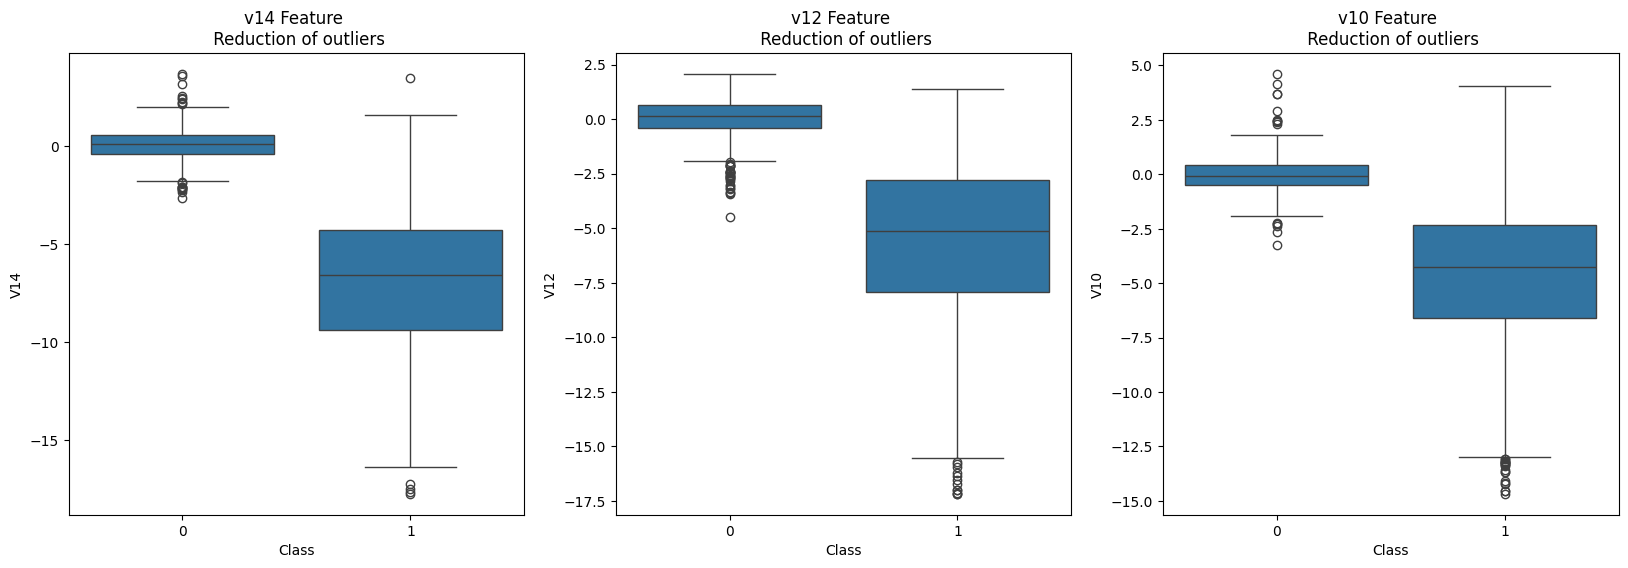

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

#feature v14
sns.boxplot(x = "Class", y = "V14", data = new_df, ax = ax1)
ax1.set_title("v14 Feature \n Reduction of outliers")

#feature V12

sns.boxplot(x = "Class", y = "V12", data = new_df, ax = ax2)
ax2.set_title("v12 Feature \n Reduction of outliers")

#eature v10 

sns.boxplot(x = "Class", y = "V10", data = new_df, ax = ax3)
ax3.set_title("v10 Feature \n Reduction of outliers")

plt.show()

#### Dimentionality Reduction 

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [23]:
X = new_df.drop("Class", axis = 1)
y  = new_df["Class"]

#T-SNE implementation
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)

#PCA implementaion 

X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)

#Truncated SVD 

X_reduced_svd = TruncatedSVD(n_components = 2, random_state = 42).fit_transform(X.values)

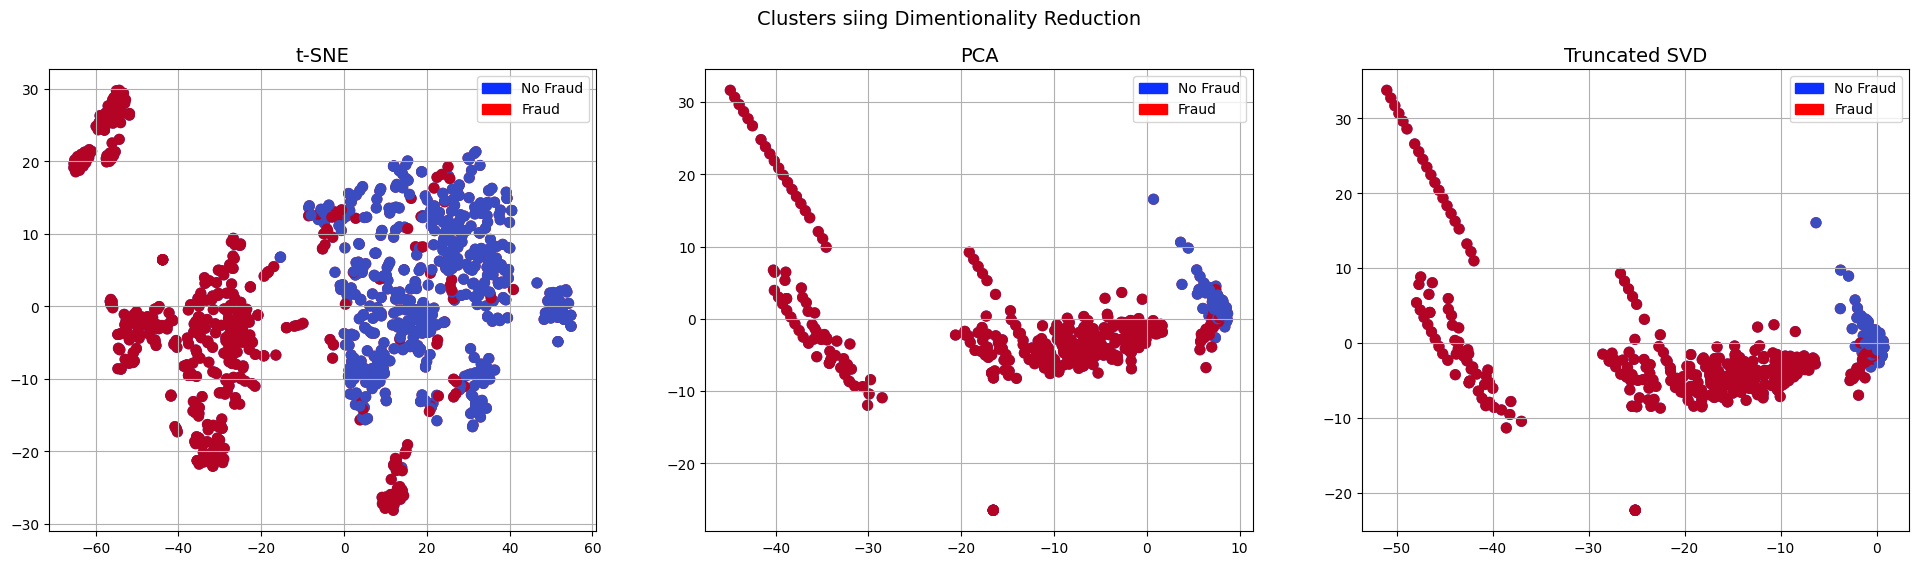

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (24, 6))

f.suptitle("Clusters siing Dimentionality Reduction", fontsize = 14)

blue_patch = mpatches.Patch(color ="#0A2FFF", label='No Fraud')
red_patch = mpatches.Patch(color ="#FF0000", label='Fraud')


#t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y == 0), cmap = "coolwarm", label = "No Fraud", linewidth = 2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y ==1), cmap = "coolwarm", label = "Fraud", linewidth = 2)
ax1.set_title("t-SNE", fontsize = 14)
ax1.grid(True)
ax1.legend(handles = [blue_patch,red_patch])


#PCA scatter plot

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c = (y==0), cmap = "coolwarm", label ="No Fraud", linewidth = 2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c = (y==1), cmap = "coolwarm", label ="Fraud", linewidth = 2)
ax2.set_title ("PCA", fontsize = 14)
ax2.grid(True)
ax2.legend(handles = [blue_patch, red_patch])

# Truncated SVD scatter plot

ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:,1], c = (y == 0), cmap = "coolwarm", label = "No Fraud", linewidth = 2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:,1], c = (y == 1), cmap = "coolwarm", label = "Fraud", linewidth = 2)
ax3.set_title ("Truncated SVD", fontsize = 14)
ax3.grid(True)
ax3.legend(handles = [blue_patch, red_patch])

plt.show()

In [26]:
X = new_df.drop("Class", axis = 1)
y = new_df["Class"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)